In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [3]:
#import the dataset
cc= pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Understanding the Dataset

In [4]:
print(cc.shape)

(8950, 18)


In [5]:
cc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [1]:
#Look at data using the info() function
cc.info()

NameError: name 'cc' is not defined

    The info() function is critical to understand the data.
    As you can see there are 17 numerical columns and first column as object columns

In [7]:
#Look at summary statistics of data using the describe() function
cc.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C15315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [8]:
# Let's get unique values for each category
unique_vals = {
    k: cc[k].unique()
    for k in cc.columns
}

unique_vals

{'CUST_ID': array(['C10001', 'C10002', 'C10003', ..., 'C19188', 'C19189', 'C19190'],
       dtype=object),
 'BALANCE': array([  40.900749, 3202.467416, 2495.148862, ...,   23.398673,
          13.457564,  372.708075]),
 'BALANCE_FREQUENCY': array([0.818182, 0.909091, 1.      , 0.636364, 0.545455, 0.875   ,
        0.454545, 0.727273, 0.5     , 0.888889, 0.090909, 0.272727,
        0.363636, 0.      , 0.666667, 0.75    , 0.857143, 0.181818,
        0.333333, 0.6     , 0.3     , 0.125   , 0.9     , 0.833333,
        0.8     , 0.2     , 0.777778, 0.555556, 0.25    , 0.142857,
        0.571429, 0.4     , 0.444444, 0.714286, 0.222222, 0.1     ,
        0.625   , 0.428571, 0.111111, 0.285714, 0.7     , 0.375   ,
        0.166667]),
 'PURCHASES': array([  95.4 ,    0.  ,  773.17, ...,  291.12,  144.4 , 1093.25]),
 'ONEOFF_PURCHASES': array([   0.  ,  773.17, 1499.  , ...,  734.4 , 1012.73, 1093.25]),
 'INSTALLMENTS_PURCHASES': array([  95.4 ,    0.  , 1333.28, ...,  113.28,  291.12,  144.4 ])

**Initial Observations**

*     CUST_ID has unique values for each observation. Keeping this will make algorithm complex. we will ignore the columns from our analyis
*      few of the columns have high variance
*     There are frquency columns where the values are between 0-1. We need to find a way where we can convert them into categorical as 0-no frequently purchased, 1-not frequently purchased
    

In [9]:
#CUST_ID is a dataset artifact, not something useful for analysis
cc= cc.drop("CUST_ID", axis=1)

In [10]:
cc.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
#CREDIT_LIMIT and MINIMUM_PAYMENTS have some missing value.so fill missing values with median value

cc= cc.fillna(cc.median())

# Checking no more NULLs in the data
all(cc.isna().sum() == 0)

True

In [12]:
cc.describe(include='all')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Exploratory Data Analysis

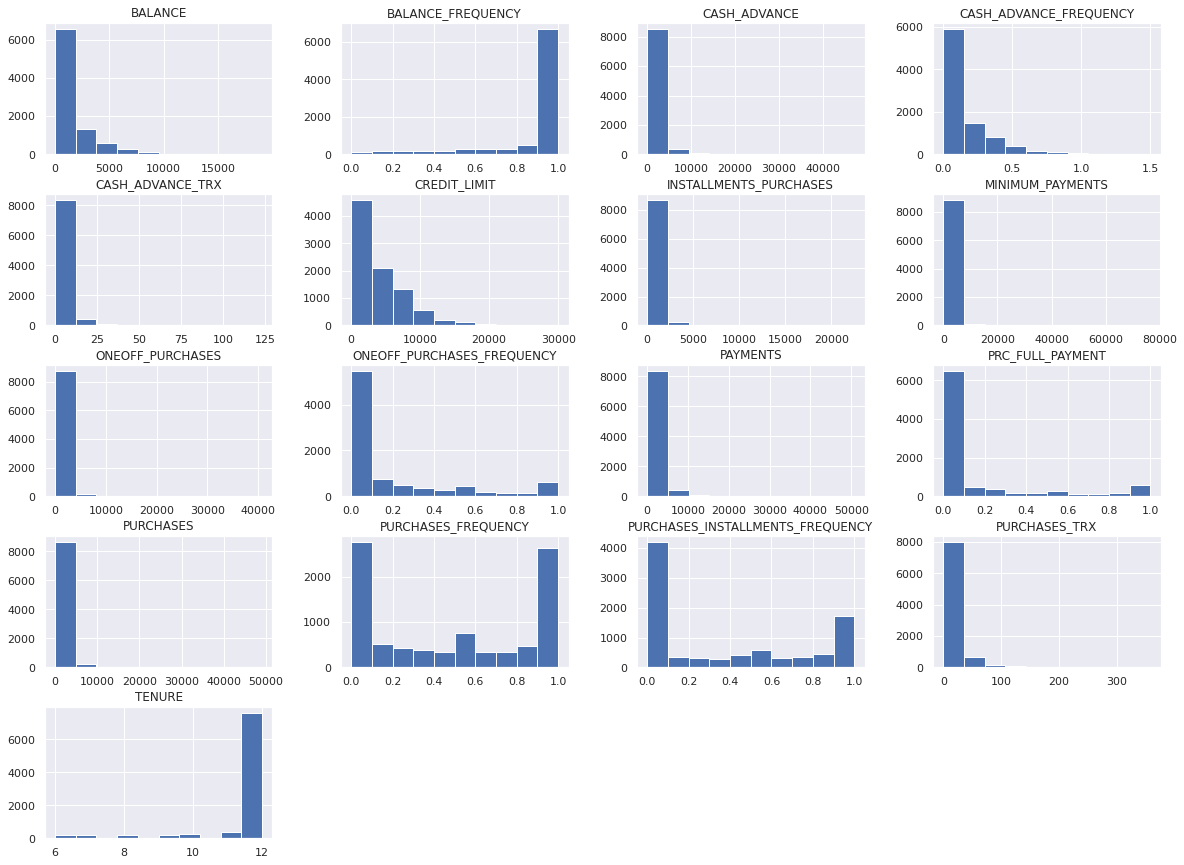

In [13]:
#since all the attributes are numerical first we will understand the distributions of the data on each attributes

cc.hist(figsize=(20,15))
plt.title('Data',fontsize=12)
plt.show()

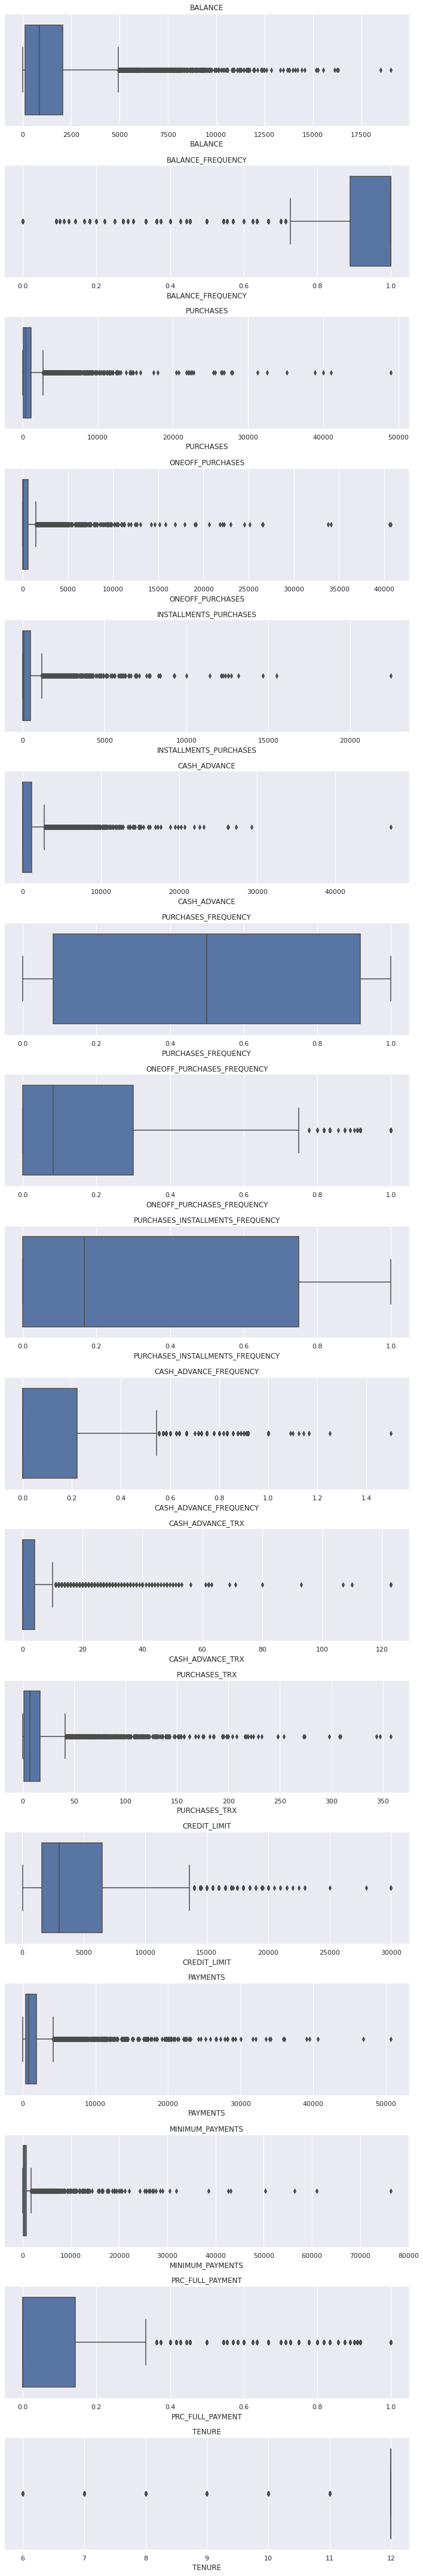

In [14]:
n= len(cc.columns)

plt.figure(figsize=(10,60))
for i in range(n):
    plt.subplot(17,1,i+1)
    sns.boxplot(cc[cc.columns[i]])
    plt.title(cc.columns[i])
plt.tight_layout()

There are outliers present in almost all the features.

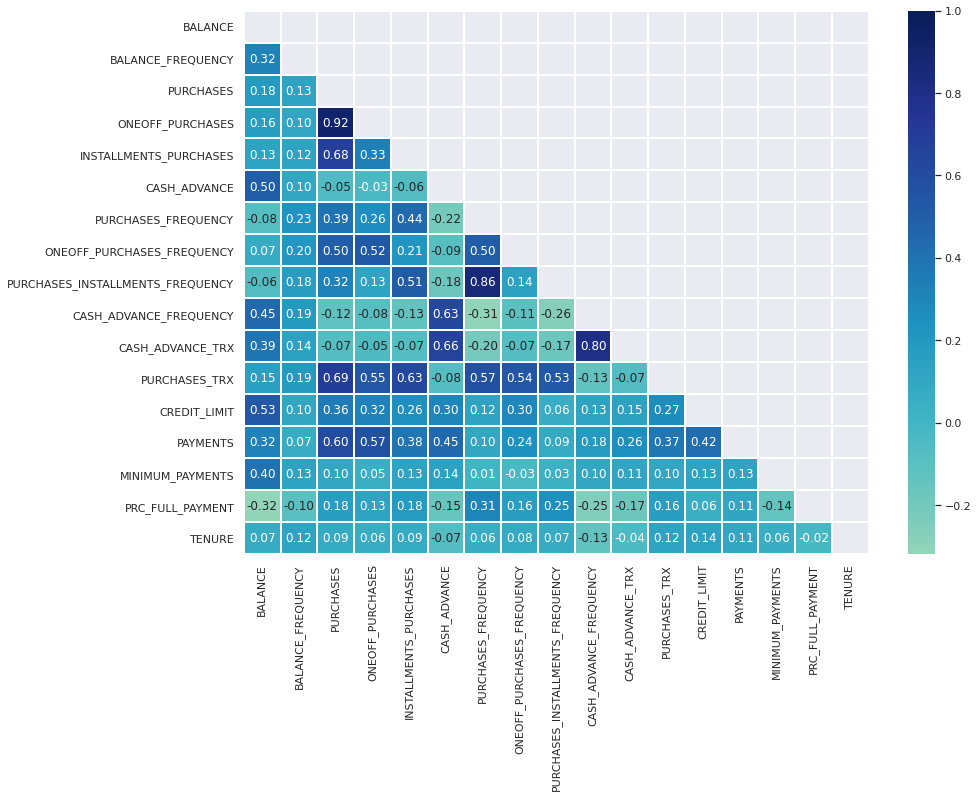

In [15]:
# Create the correlation matrix
corr = cc.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(14,10))
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap='YlGnBu',center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [16]:
cc.var().sort_values()

CASH_ADVANCE_FREQUENCY              4.004857e-02
BALANCE_FREQUENCY                   5.612351e-02
PRC_FULL_PAYMENT                    8.555578e-02
ONEOFF_PURCHASES_FREQUENCY          8.900441e-02
PURCHASES_INSTALLMENTS_FREQUENCY    1.579647e-01
PURCHASES_FREQUENCY                 1.610985e-01
TENURE                              1.791129e+00
CASH_ADVANCE_TRX                    4.657580e+01
PURCHASES_TRX                       6.179027e+02
INSTALLMENTS_PURCHASES              8.178274e+05
ONEOFF_PURCHASES                    2.755228e+06
BALANCE                             4.332775e+06
CASH_ADVANCE                        4.398096e+06
PURCHASES                           4.565208e+06
MINIMUM_PAYMENTS                    5.441920e+06
PAYMENTS                            8.381394e+06
CREDIT_LIMIT                        1.323975e+07
dtype: float64

Most of the features have high variance are in different scales. We need to center these variances around 0.

**Transforming Features for better clustering**

In [17]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
cc_scaled= sc.fit_transform(cc)

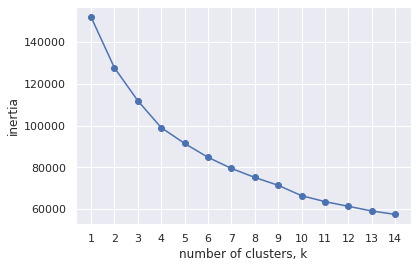

In [18]:
#checking optimal value of k using elbow method

from sklearn.cluster import KMeans

ks = range(1, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model= KMeans(n_clusters=k)
        # Fit model to samples
    model.fit(cc_scaled)
        # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    # Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [19]:
clusters_df=pd.DataFrame({'num_clusters':ks,'cluster_errors':inertias})
clusters_df

,num_clusters,cluster_errors
0,1,152150.000000
1,2,127784.962423
2,3,111974.040065
3,4,99061.939842
4,5,91491.658452
5,6,84826.738349
6,7,79506.583536
7,8,75185.093410
8,9,71414.477024
9,10,66442.133061


In [20]:
#choose k = 4 for number of clusters, based on plot above. also after k=4 the slope of the line is almot constant as well.

from sklearn.cluster import KMeans

KM= KMeans(n_clusters=4)
KM.fit(cc_scaled)

KM_labels = KM.fit_predict(cc_scaled)
KM_labels

array([1, 3, 2, ..., 2, 1, 1], dtype=int32)

In [21]:
KM.cluster_centers_.shape

(4, 17)

In [22]:
print(KM.inertia_)

99061.93734650433


In [23]:
cc['cluster_labels'] = KM_labels
cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


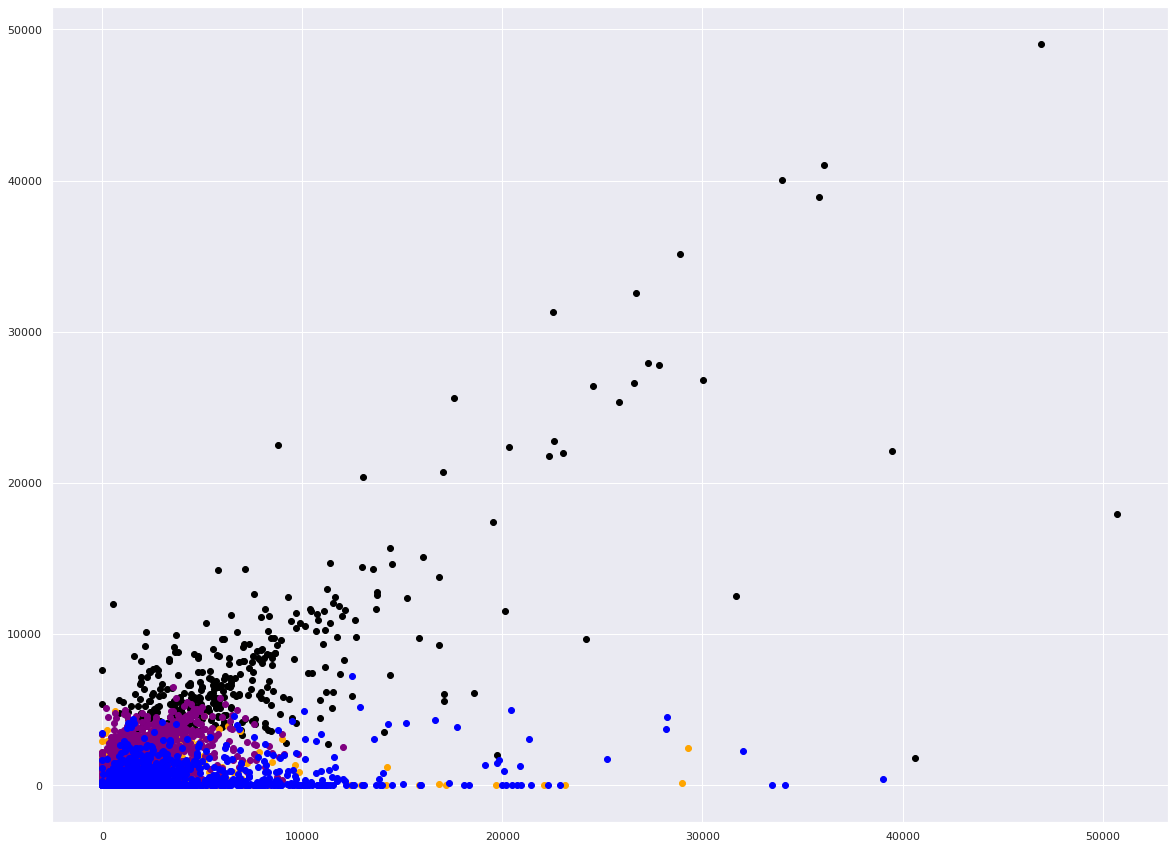

In [24]:
plt.figure(figsize=(20,15))
df1= cc[cc.cluster_labels==0]
df2= cc[cc.cluster_labels==1]
df3= cc[cc.cluster_labels==2]
df4= cc[cc.cluster_labels==3]


plt.scatter(df1['PAYMENTS'], df1['PURCHASES'], color='black')
plt.scatter(df2['PAYMENTS'], df2['PURCHASES'], color='orange')
plt.scatter(df3['PAYMENTS'], df3['PURCHASES'], color='purple')
plt.scatter(df4['PAYMENTS'], df4['PURCHASES'], color='blue')

plt.show()

In [25]:
cc['cluster_labels'].value_counts()

1    3978
2    3366
3    1197
0     409
Name: cluster_labels, dtype: int64

In [26]:
cc.groupby('cluster_labels').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_labels,,,,,,,,,,,,,,,,,
0,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
1,1012.745945,0.789977,270.213240,210.016021,60.464108,597.051145,0.170249,0.086322,0.080642,0.114901,2.125943,2.907240,3278.193397,975.085151,553.868540,0.077983,11.446707
2,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,639.740452,0.269313,11.594474
3,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800


Cluster-0

Balance is very high and gets updated frequently. Majority of purchases being done by paying cash in advance and it is being done quite frequently. Credit Limit is comparitively high. Minimum Payment done for  the purchases are high compared to others

Cluster 1 : 

Low balance but the balance gets updated frequently ie. more no. of transactions. No of purchases from the account are also quite large and majority of the purchases are done either in one go or in installments but not by paying cash in advance.

Cluster-2
Balance is comparatively high and balance gets updated. No of Purchases are high. Purchases done either in one go or in installments are very high and done very frequently. Credit Limit is very high. Payments made are very high. Full Payments Percent of full payment paid by user.

Cluster-3

Balance is high but the balance doesnt get updated. No. of purchases from the account are very low. Purchases done either in one go or in installments are verly low. Purchases are not done quite frequently. Credit Limit is very low. Payment and Minimum payment is very low

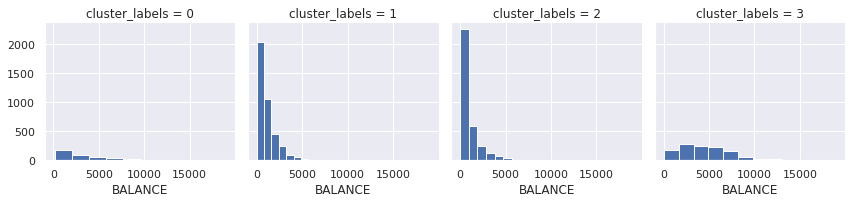

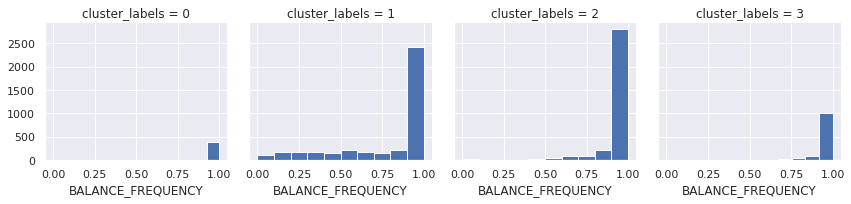

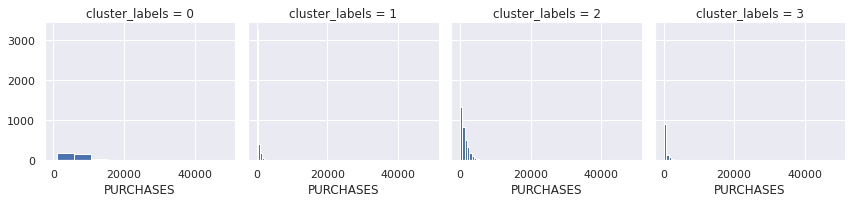

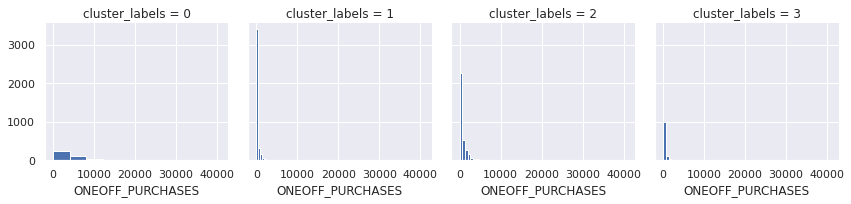

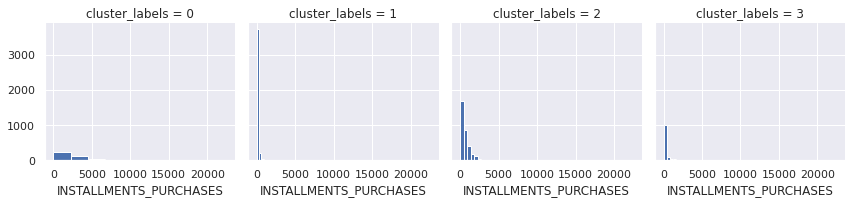

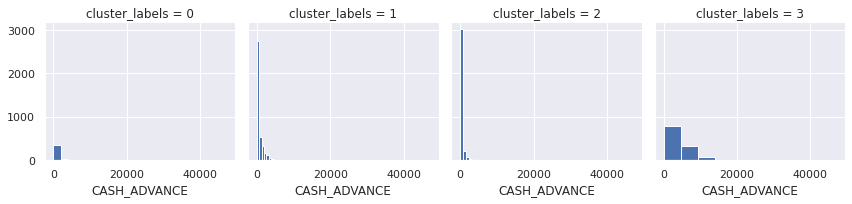

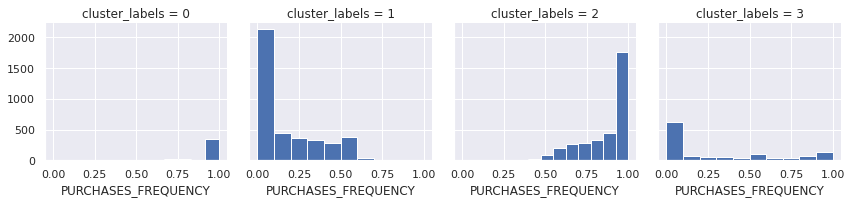

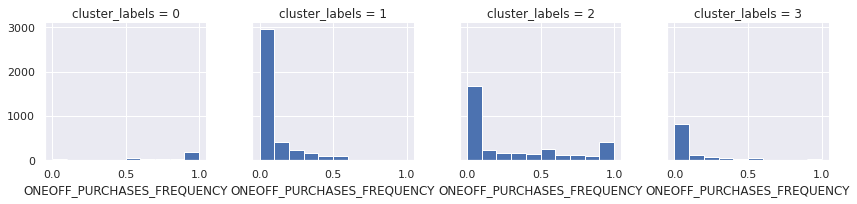

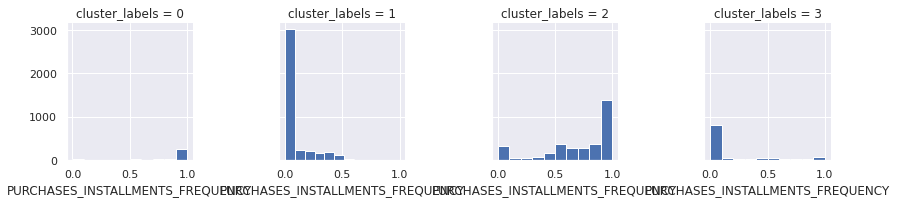

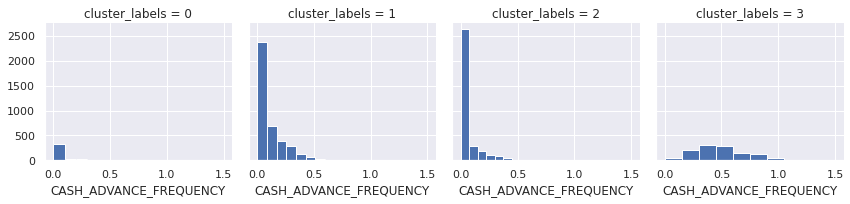

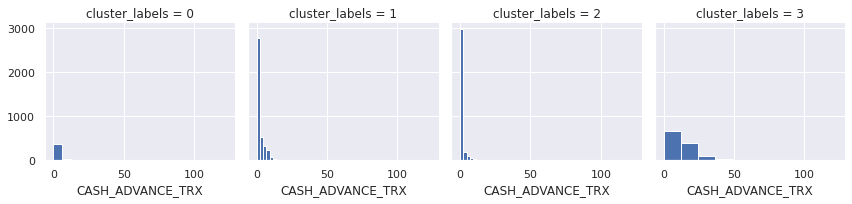

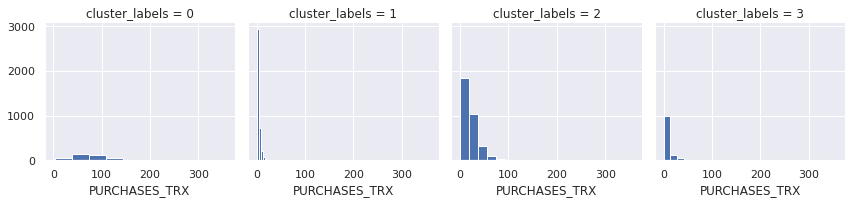

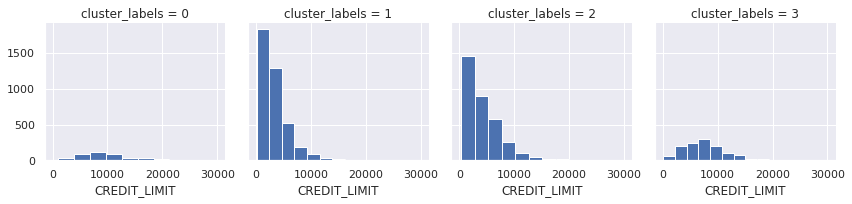

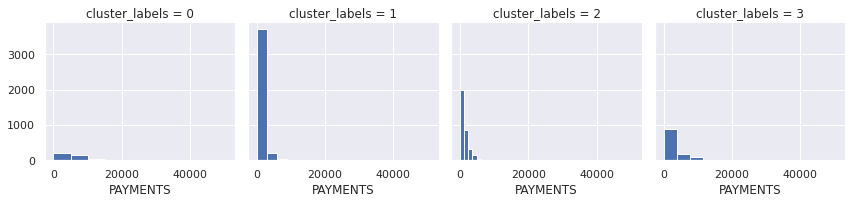

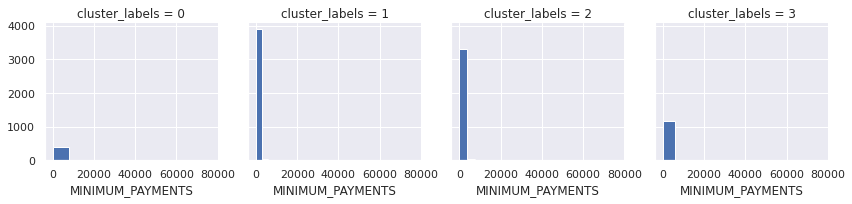

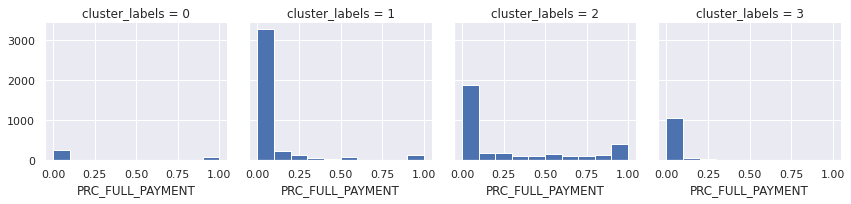

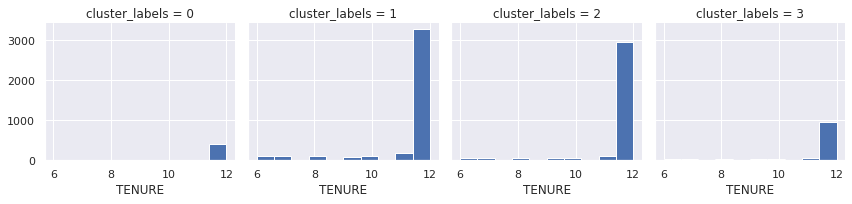

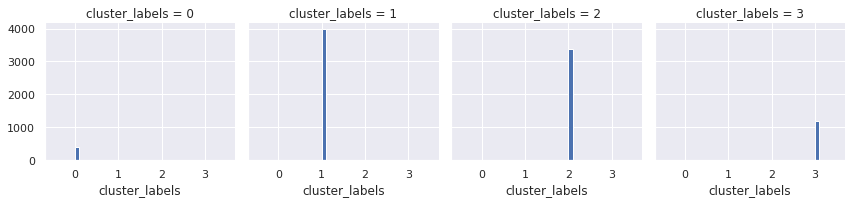

In [27]:
for c in cc:
    grid= sns.FacetGrid(cc, col='cluster_labels')
    grid.map(plt.hist, c)

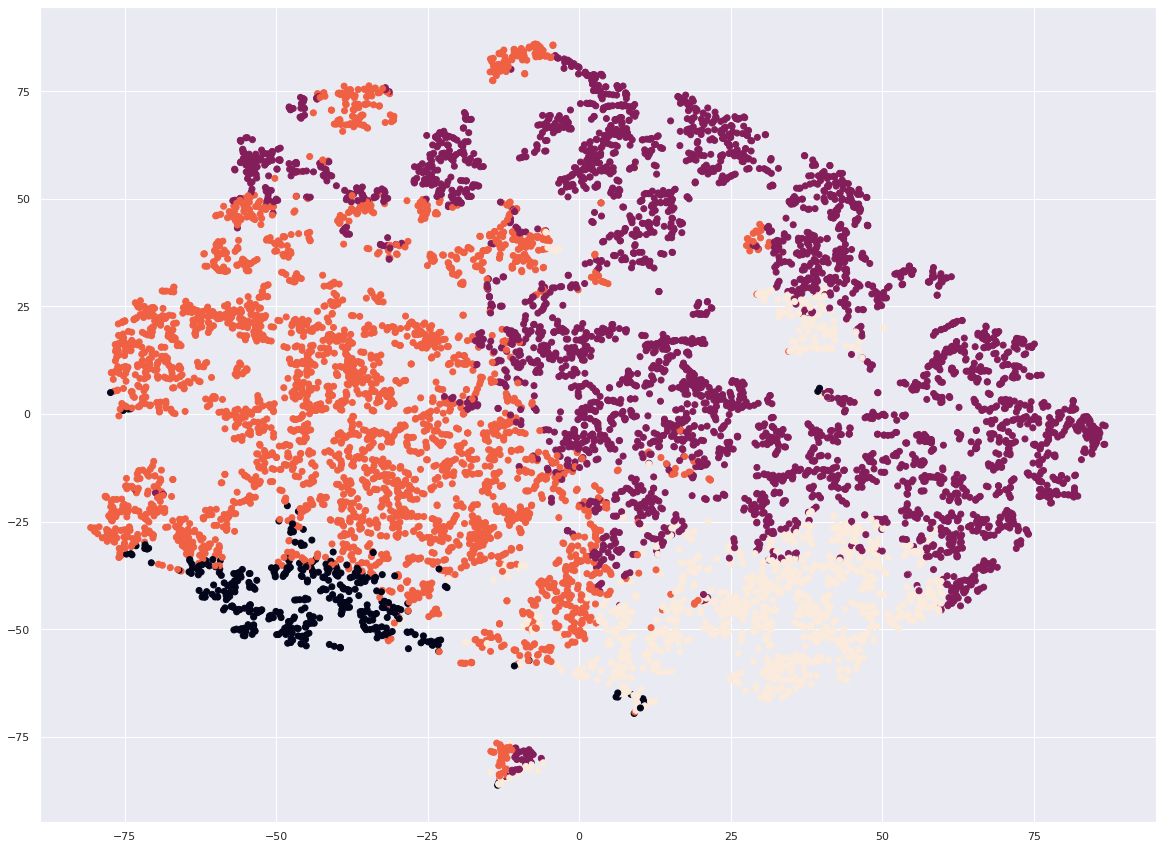

In [28]:
#t-SNE provides great visualizations when the individual samples can be labeled

from sklearn.manifold import TSNE
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(cc_scaled)

# Select the 0th feature: xs
xs = tsne_features[:,0]
# Select the 1st feature: ys
ys = tsne_features[:,1]

plt.figure(figsize=(20,15))
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=KM_labels)
plt.show()

**Visualising Hierarchies**

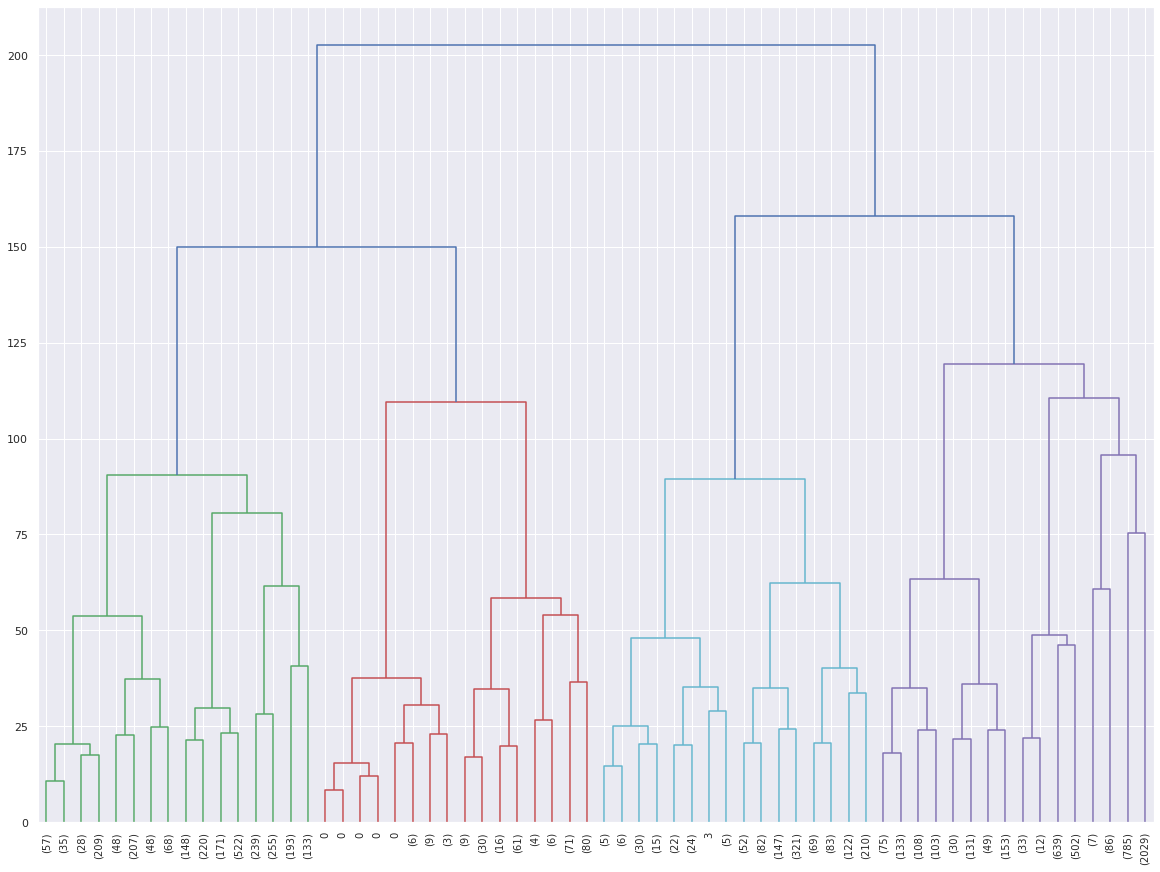

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

#calculate the linkage: mergings
mergings= linkage(cc_scaled, method='ward')

plt.figure(figsize=(20,15))
#Plot the dendrogram, using labels
dendrogram(mergings, labels=KM_labels, p=5, leaf_rotation=90,leaf_font_size=10, truncate_mode='level')

plt.show()

**Principal Component Analysis**

In [30]:
from sklearn.decomposition import PCA

model= PCA()

model.fit_transform(cc_scaled)

array([[-1.68364879e+00, -1.07224148e+00,  4.75660084e-01, ...,
         1.49962336e-01,  4.82655442e-02, -1.60528758e-04],
       [-1.13408493e+00,  2.50914981e+00,  6.02216308e-01, ...,
        -5.32950936e-01, -8.29086834e-02,  3.07157685e-06],
       [ 9.69394988e-01, -3.83576903e-01,  9.09697616e-02, ...,
         2.21683158e-01,  5.11324941e-01,  2.23296494e-05],
       ...,
       [-9.28985122e-01, -1.80804835e+00, -4.58242377e-01, ...,
         4.60675887e-01,  1.57799814e-01, -1.63043472e-04],
       [-2.33784475e+00, -6.53611332e-01,  9.82831153e-01, ...,
         2.63789927e-01, -1.89595873e-01, -8.58602334e-05],
       [-5.58026533e-01, -4.00646098e-01,  1.03364560e+00, ...,
        -4.18806582e-01,  3.57426555e-01, -7.42947186e-05]])

**Variances of the PCA features**

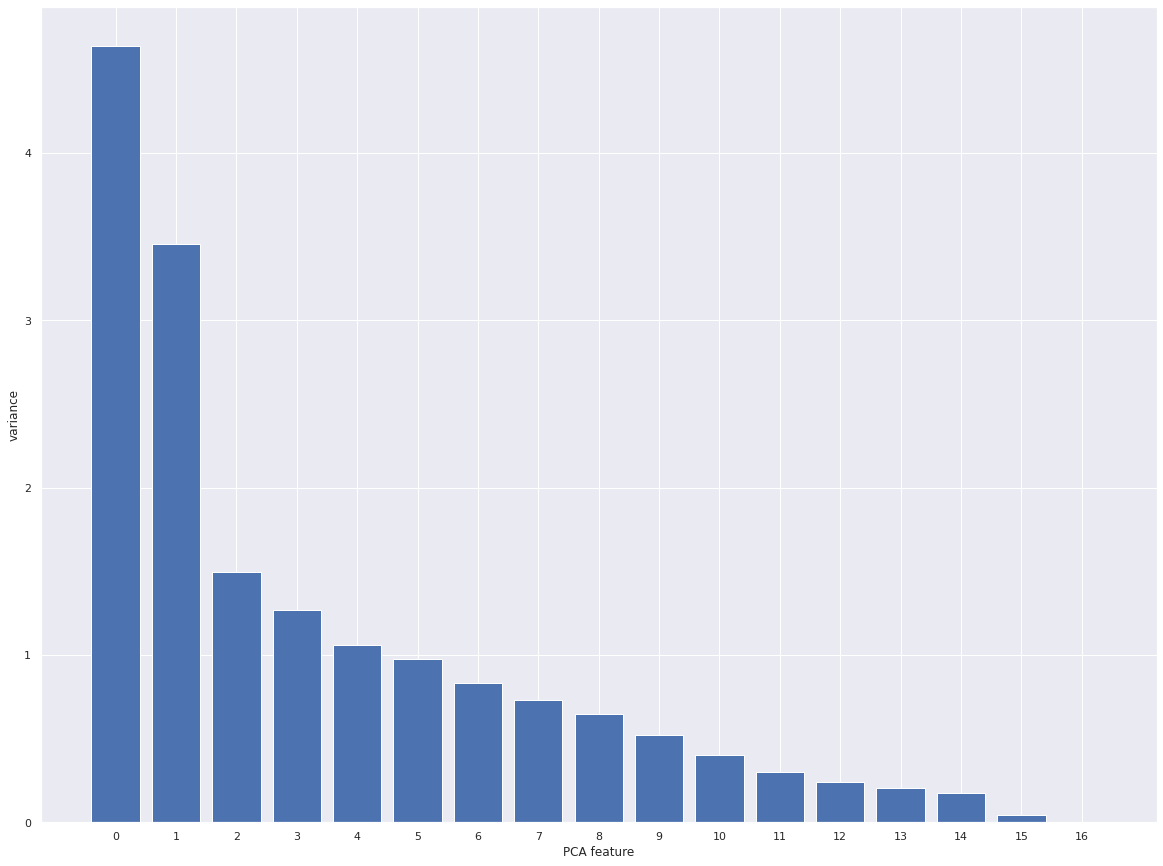

In [31]:
# Plot the explained variances
features = range(model.n_components_)
plt.figure(figsize=(20,15))
plt.bar(features, model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

 It looks like PCA features 0 and 1 have significant variance. The intrinsic dimension of this dataset appears to be 2

**Dimensionality reduction with PCA**

In [32]:
pca= PCA(n_components= 2)

pca.fit(cc_scaled)
pca_features=pca.transform(cc_scaled)

print(pca_features.shape)

(8950, 2)


Notice PCA reduced the high dimension features of 17 to intrinsic dimension of 2. However, the observations remains same

In [33]:
# Create a dataframe with the two PCA components
pca_df = pd.DataFrame(data=pca_features,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.683649,-1.072241
1,-1.134086,2.509151
2,0.969394,-0.383575
3,-0.888220,0.004648
4,-1.600021,-0.683794


In [34]:
# Concatenate the clusters labels to the dataframe
df = pd.concat([pca_df,pd.DataFrame({'cluster':KM_labels})], axis = 1)
df.head()

,pca1,pca2,cluster
0,-1.683649,-1.072241,1
1,-1.134086,2.509151,3
2,0.969394,-0.383575,2
3,-0.888220,0.004648,1
4,-1.600021,-0.683794,1


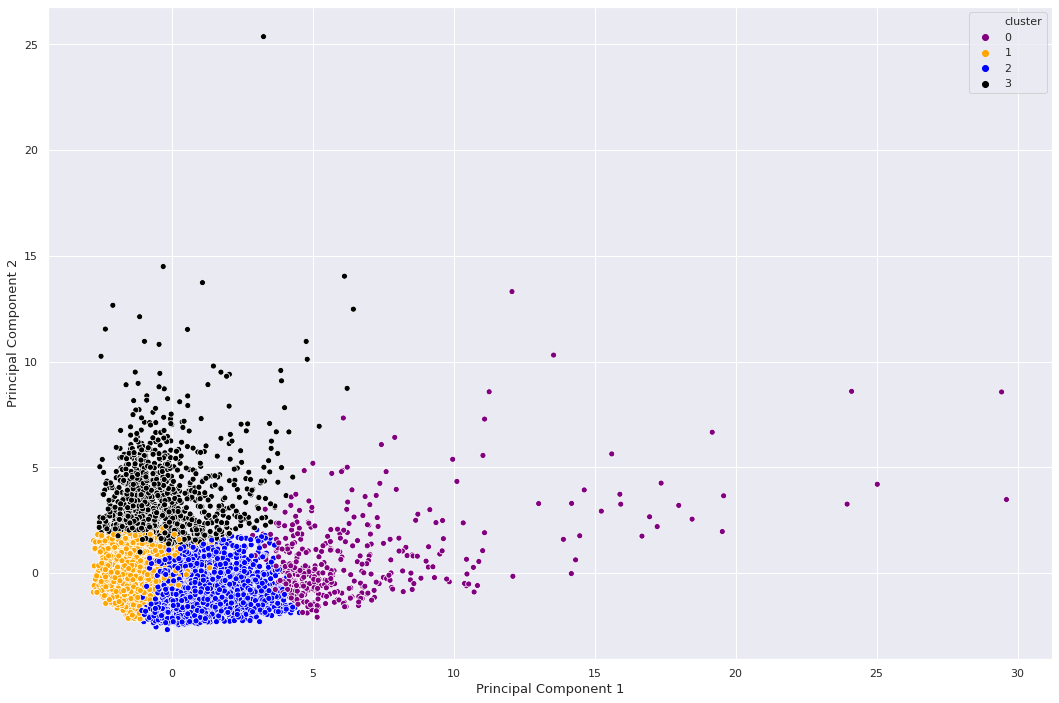

In [35]:
plt.figure(figsize=(18,12))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette=['purple','orange','blue','black'])
plt.xlabel('Principal Component 1', fontsize=13)
plt.ylabel('Principal Component 2', fontsize=13)
plt.show()